#Visualizing a Time Series in Python: Airline Passengers Example

##Step 1: Setting Up Your Environment

In [1]:
# Import the necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

# Set style for better visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

##Step 2: Loading the Airline Passengers Dataset


In [2]:
!curl -L -o ./air-passengers.zip\
  https://www.kaggle.com/api/v1/datasets/download/abhishekmamidi/air-passengers
!unzip -o air-passengers.zip

  # Load data from CSV
# Note: If you're using the classic Air Passengers dataset, it's structured with dates and passenger counts
data = pd.read_csv('AirPassengers.csv')

# Convert the Month column to datetime format
data['Month'] = pd.to_datetime(data['Month'])
# Set Month as the index for time series analysis
data.set_index('Month', inplace=True)

# Display the first few rows to understand the data structure
print("First five rows of the dataset:")
print(data.head())

# Basic information about the dataset
print("\nDataset information:")
print(data.info())
print("\nSummary statistics:")
print(data.describe())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   764  100   764    0     0    780      0 --:--:-- --:--:-- --:--:--  2840
Archive:  air-passengers.zip
  inflating: AirPassengers.csv       
First five rows of the dataset:
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

Dataset information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

Summary statistics:
       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.

##Step 3: Visualizing the Raw Time Series Data


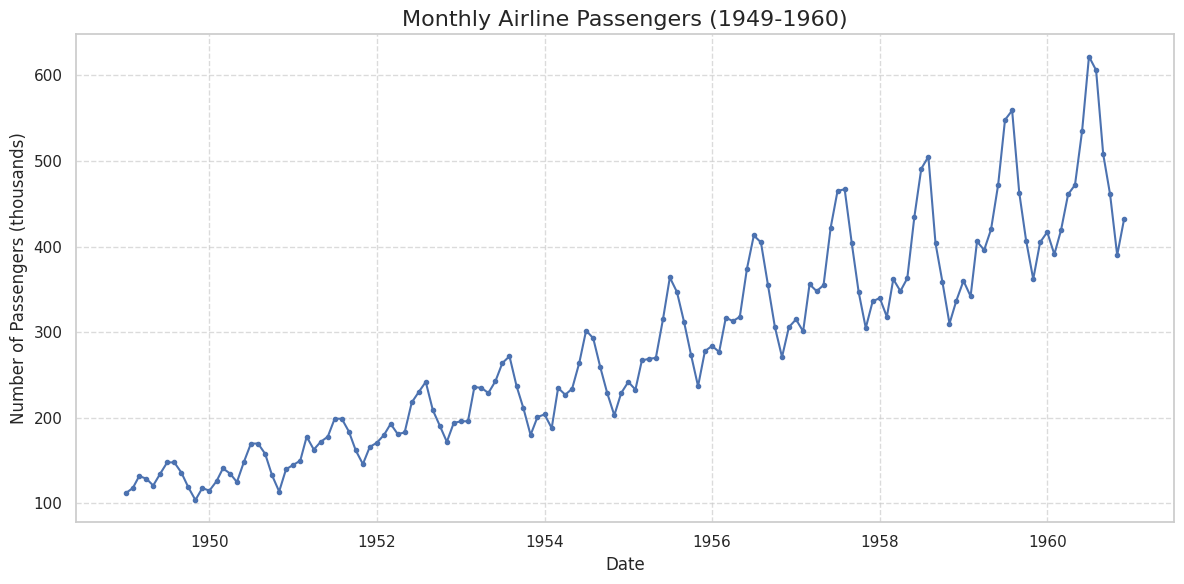

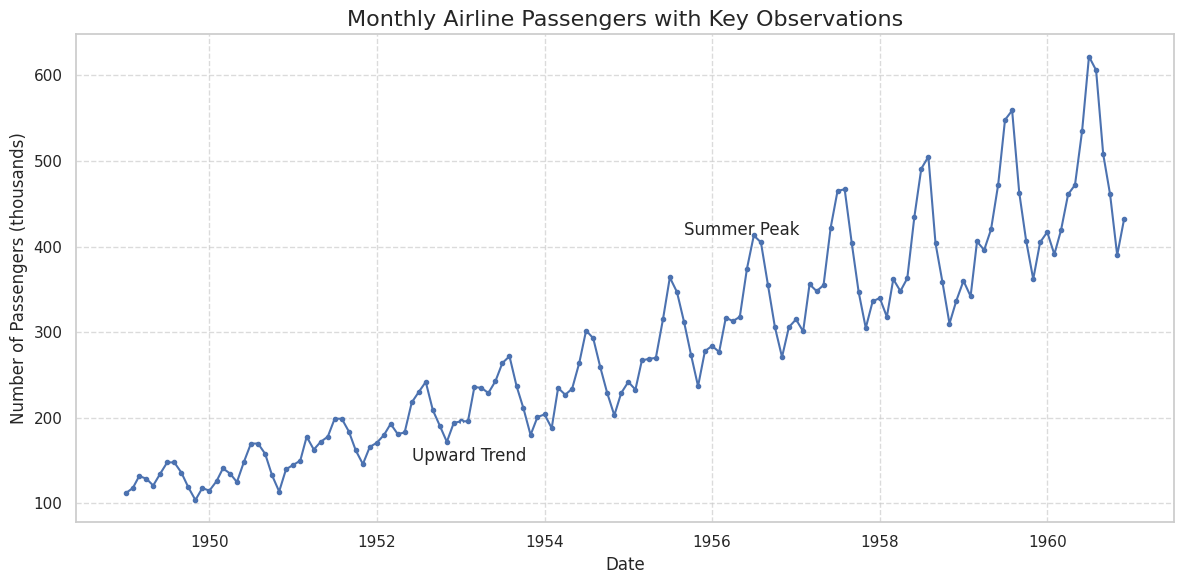

In [3]:
# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['#Passengers'], marker='o', markersize=3, linestyle='-')
plt.title('Monthly Airline Passengers (1949-1960)', fontsize=16)
plt.ylabel('Number of Passengers (thousands)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# #added during screencast
# Adding annotations to highlight key points in the data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['#Passengers'], marker='o', markersize=3, linestyle='-')
plt.title('Monthly Airline Passengers with Key Observations', fontsize=16)
plt.ylabel('Number of Passengers (thousands)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.annotate('Summer Peak', xy=(pd.Timestamp('1955-07-01'), data.loc['1955-07-01', '#Passengers']),
             xytext=(pd.Timestamp('1955-09-01'), data.loc['1955-07-01', '#Passengers']+50),
             arrowprops=dict(arrowstyle='->'))
plt.annotate('Upward Trend', xy=(pd.Timestamp('1953-01-01'), 200),
             xytext=(pd.Timestamp('1952-06-01'), 150),
             arrowprops=dict(arrowstyle='->'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##Step 4: Examining Trends and Seasonality


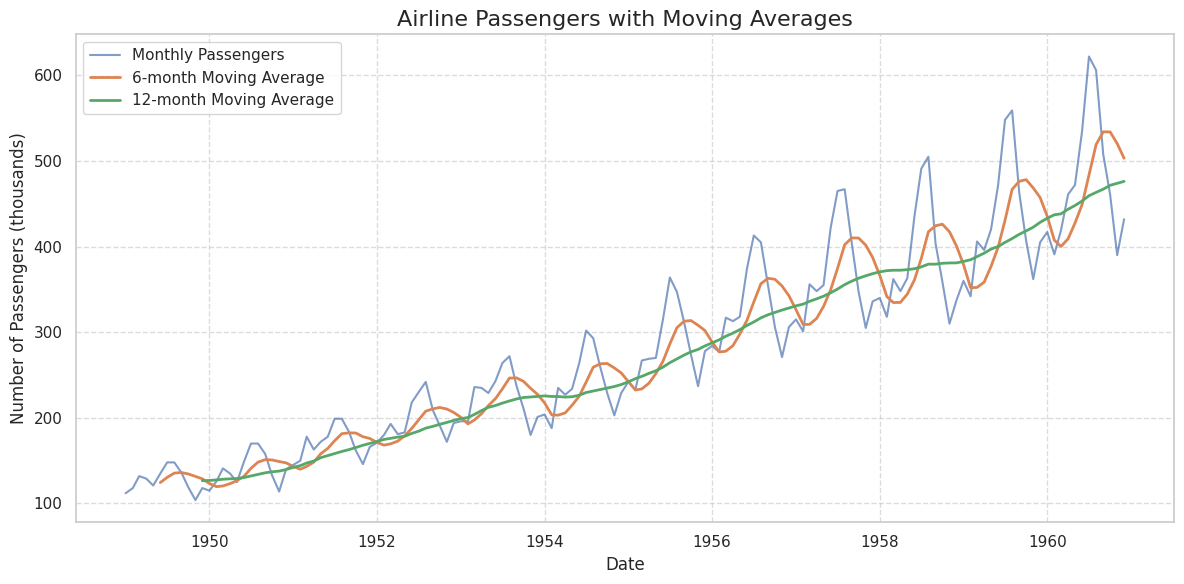

In [4]:
# Calculate rolling averages to identify trends
data['6-month Average'] = data['#Passengers'].rolling(window=6).mean()
data['12-month Average'] = data['#Passengers'].rolling(window=12).mean()

# Plot the raw data with moving averages
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['#Passengers'], label='Monthly Passengers', alpha=0.7)
plt.plot(data.index, data['6-month Average'], label='6-month Moving Average', linewidth=2)
plt.plot(data.index, data['12-month Average'], label='12-month Moving Average', linewidth=2)
plt.title('Airline Passengers with Moving Averages', fontsize=16)
plt.ylabel('Number of Passengers (thousands)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Decomposing Time Series into Trend, Seasonality, and Noise

## Step 1: Observing Monthly Seasonal Patterns


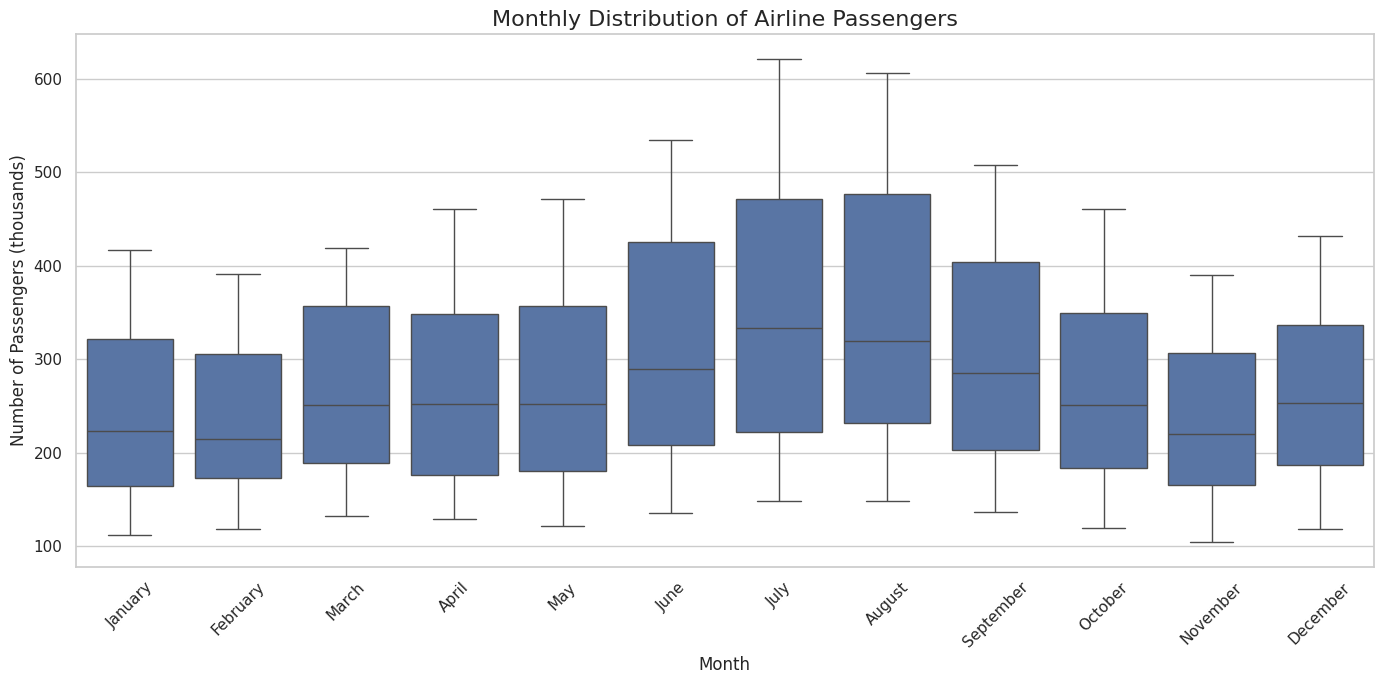

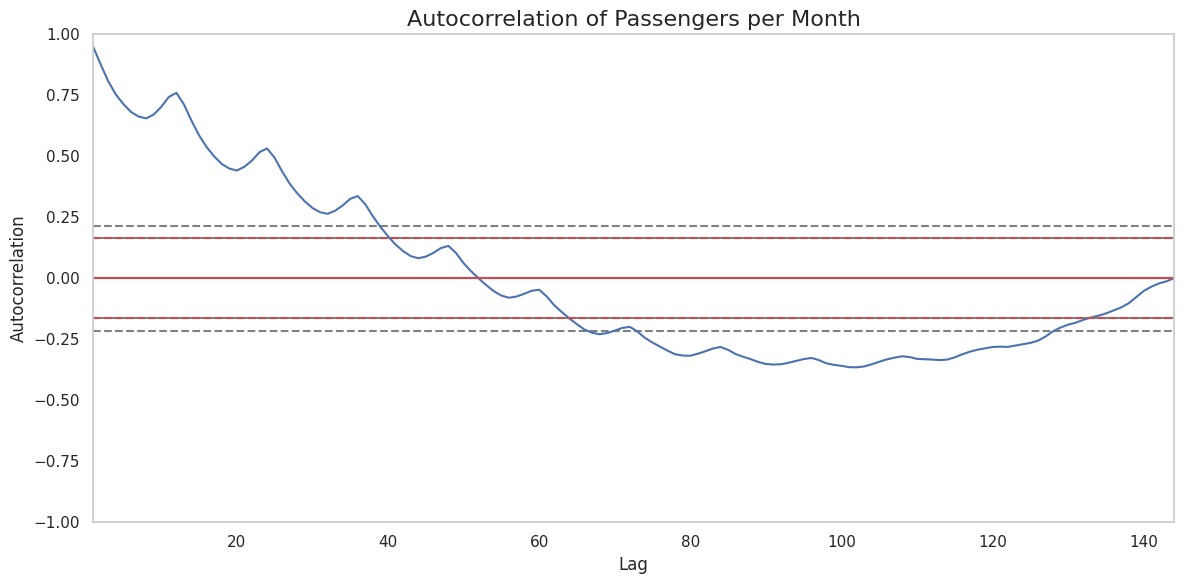

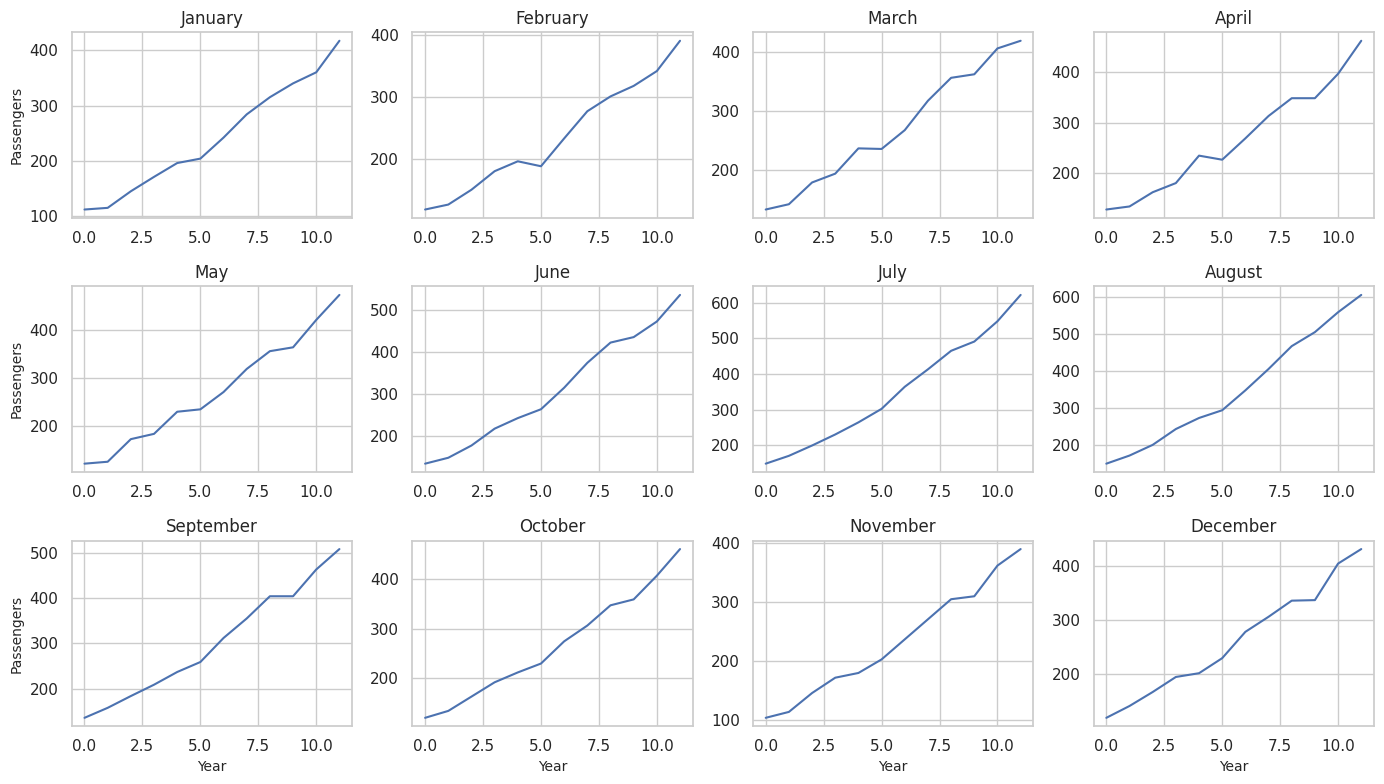

In [5]:
# Extract month information for seasonal analysis
data['MonthNum'] = data.index.month
data['MonthName'] = data.index.month_name()

# Create a boxplot to show monthly distributions
plt.figure(figsize=(14, 7))
sns.boxplot(x='MonthName', y='#Passengers', data=data,
            order=['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Monthly Distribution of Airline Passengers', fontsize=16)
plt.ylabel('Number of Passengers (thousands)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# #added during screencast
# Autocorrelation plot to identify seasonal patterns
pd.plotting.autocorrelation_plot(data['#Passengers'])
plt.title('Autocorrelation of Passengers per Month', fontsize=16)
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=-1.96/np.sqrt(len(data)), color='r', linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(data)), color='r', linestyle='--')
plt.tight_layout()
plt.show()

# Seasonal subseries plot
years = data.index.year.unique()
months = range(1, 13)

plt.figure(figsize=(14, 8))
for i, month in enumerate(months, 1):
    plt.subplot(3, 4, i)
    month_data = data[data.index.month == month]['#Passengers']
    plt.plot(month_data.values)
    plt.title(f"{pd.date_range(start='2020-01-01', periods=12, freq='ME')[i-1].month_name()}", fontsize=12)
    if i > 8:
        plt.xlabel('Year', fontsize=10)
    if i % 4 == 1:
        plt.ylabel('Passengers', fontsize=10)
plt.tight_layout()
plt.show()

## Step 2: Applying Insights to Future Forecasting


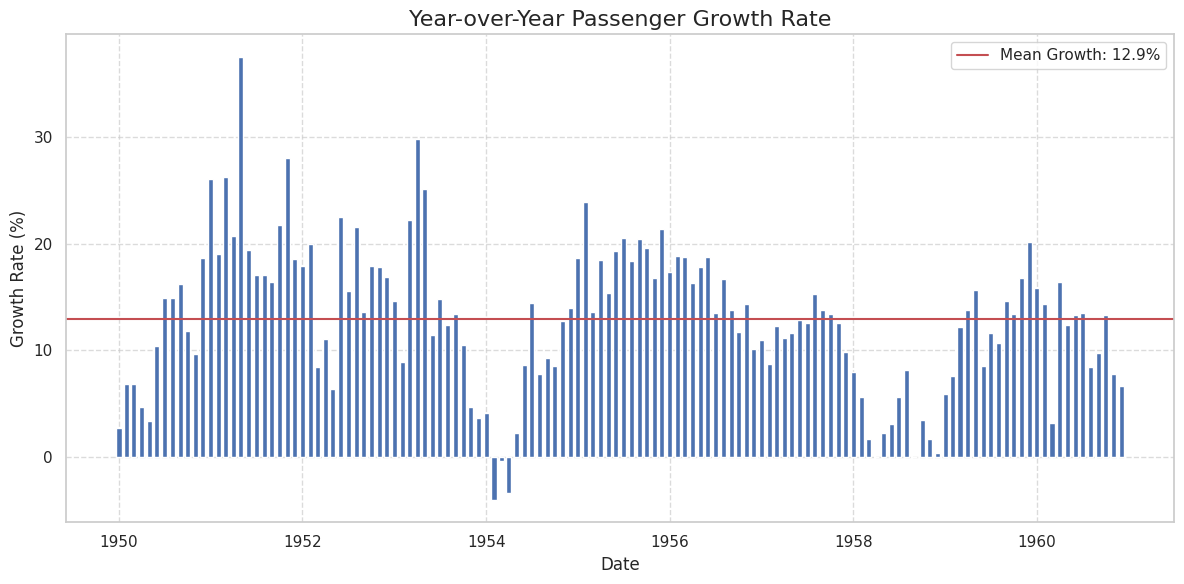

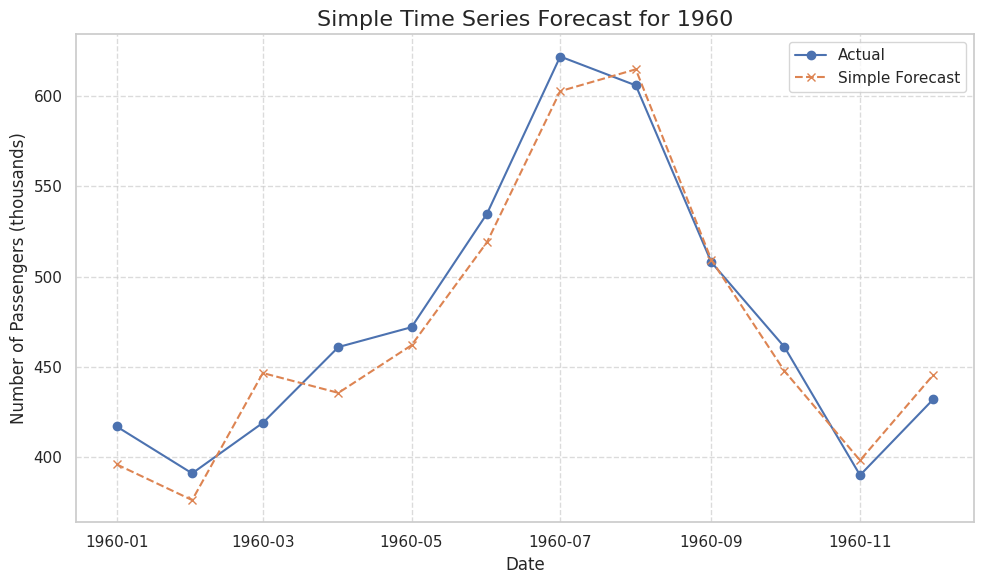

Forecast Evaluation:
Mean Absolute Error: 14.92
Mean Percentage Error: 0.99%


In [6]:
# Calculate year-over-year growth rates
data['YearAgo'] = data['#Passengers'].shift(12)
data['YoY_Growth'] = (data['#Passengers'] - data['YearAgo']) / data['YearAgo'] * 100

# Plot growth rates over time
plt.figure(figsize=(12, 6))
plt.bar(data.index[12:], data['YoY_Growth'][12:], width=20)
plt.axhline(y=data['YoY_Growth'][12:].mean(), color='r', linestyle='-', label=f'Mean Growth: {data["YoY_Growth"][12:].mean():.1f}%')
plt.title('Year-over-Year Passenger Growth Rate', fontsize=16)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# #added during screencast
# Simple forecast demonstration (last 12 months as prediction base)
train_data = data[:'1959-12-01']
test_data = data['1960-01-01':]

# Calculate average monthly factors from the training data
monthly_factors = train_data.groupby(train_data.index.month)['#Passengers'].mean()
monthly_factors = monthly_factors / monthly_factors.mean()

# Use the last year's value and apply seasonal factors for a naive forecast
last_year_value = train_data['#Passengers'].iloc[-12:].values
trend_factor = 1.1  # Assume 10% annual growth based on historical data
forecast = last_year_value * trend_factor

# Plot actual vs simple forecast
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['#Passengers'], marker='o', label='Actual')
plt.plot(test_data.index, forecast, marker='x', linestyle='--', label='Simple Forecast')
plt.title('Simple Time Series Forecast for 1960', fontsize=16)
plt.ylabel('Number of Passengers (thousands)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Forecast Evaluation:")
print(f"Mean Absolute Error: {np.mean(np.abs(test_data['#Passengers'].values - forecast)):.2f}")
print(f"Mean Percentage Error: {np.mean((test_data['#Passengers'].values - forecast) / test_data['#Passengers'].values * 100):.2f}%")

## Step 3: Decomposing the Time Series

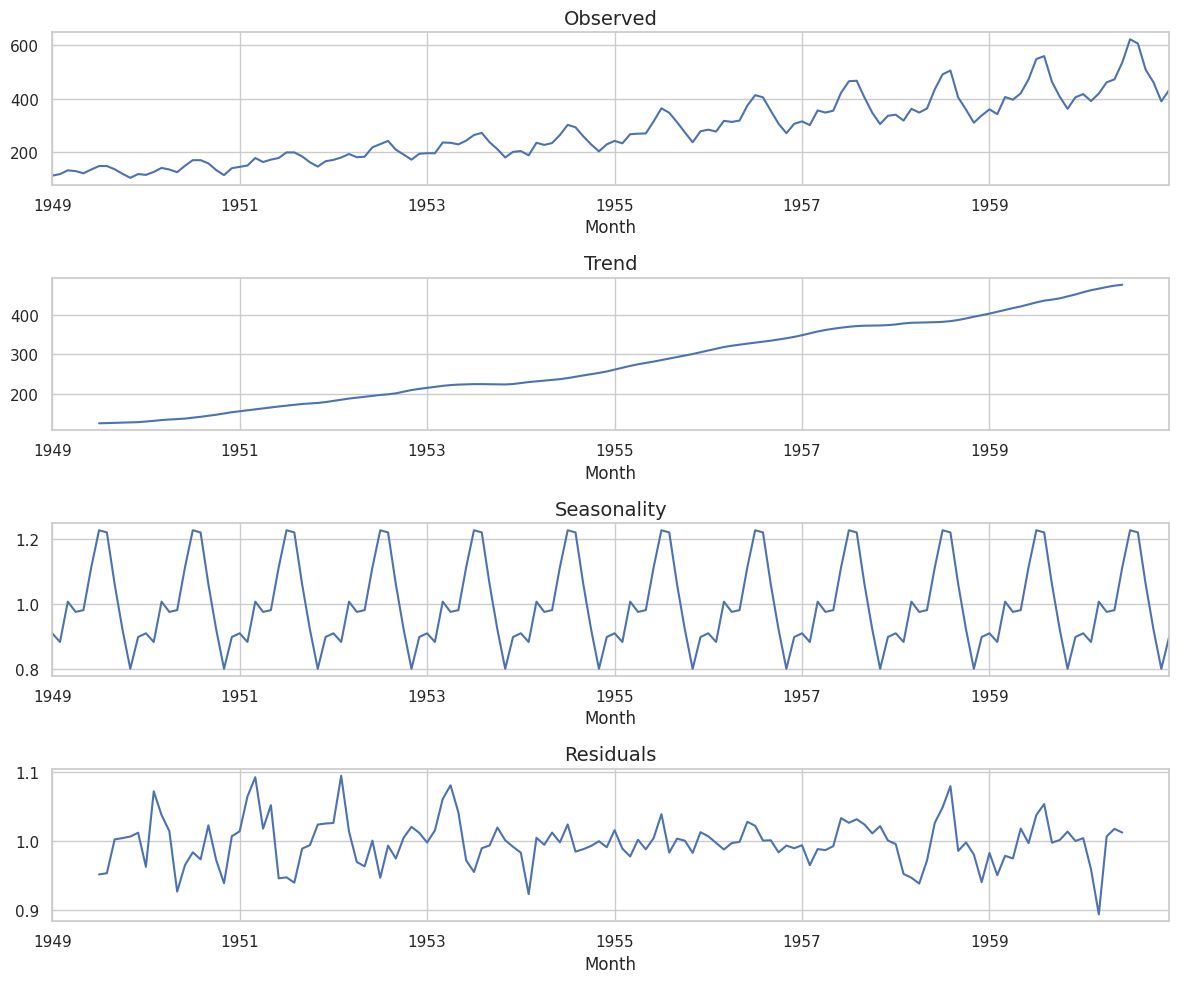

In [7]:

# Decomposing the time series to separate trend, seasonality, and residuals
decomposition = seasonal_decompose(data['#Passengers'], model='multiplicative', period=12)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed', fontsize=14)
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend', fontsize=14)
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonality', fontsize=14)
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residuals', fontsize=14)
plt.tight_layout()
plt.show()